<h1>RK1
Андрианов А.А.
ИУ5-23М<h1> 

### Вариант Задачи №1 - 1
Для набора данных проведите кодирование одного (произвольного) категориального признака с использованием метода "count (frequency) encoding".

### Вариант Задачи №2 - 21
Для набора данных проведите масштабирование данных для одного (произвольного) числового признака с использованием масштабирования по медиане.

### Дополнительные требования по группе:
Для студентов групп ИУ5-23М, ИУ5И-23М - для произвольной колонки данных построить график "Ящик с усами (boxplot)".

### Импорт необходимых библиотек

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import seaborn as sns
from matplotlib.pyplot import figure
from IPython.display import Image
!pip install category_encoders
from category_encoders.count import CountEncoder as ce_CountEncoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.7 MB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###Задача 1 (№1)
Для набора данных проведите кодирование одного (произвольного) категориального признака с использованием метода "count (frequency) encoding".

In [51]:
# Подключение к gogle диску
data = pd.read_csv('data.csv', sep=",")
data.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False


In [52]:
data_features = list(zip(
# признаки
[i for i in data.columns],
zip(
    # типы колонок
    [str(i) for i in data.dtypes],
    # проверим есть ли пропущенные значения
    [i for i in data.isnull().sum()]
)))
# Признаки с типом данных и количеством пропусков
data_features

[('type_school', ('object', 0)),
 ('school_accreditation', ('object', 0)),
 ('gender', ('object', 0)),
 ('interest', ('object', 0)),
 ('residence', ('object', 0)),
 ('parent_age', ('int64', 0)),
 ('parent_salary', ('int64', 0)),
 ('house_area', ('float64', 0)),
 ('average_grades', ('float64', 0)),
 ('parent_was_in_college', ('bool', 0)),
 ('in_college', ('bool', 0))]

In [53]:
data.isnull().sum()

type_school              0
school_accreditation     0
gender                   0
interest                 0
residence                0
parent_age               0
parent_salary            0
house_area               0
average_grades           0
parent_was_in_college    0
in_college               0
dtype: int64

In [56]:
ce_CountEncoder1 = ce_CountEncoder()
data_COUNT_ENC = ce_CountEncoder1.fit_transform(data[data.columns.difference(['in_college'])])

In [57]:
data_COUNT_ENC

,average_grades,gender,house_area,interest,parent_age,parent_salary,parent_was_in_college,residence,school_accreditation,type_school
0,84.09,515,83.0,229,56,6950000,False,539,481,609
1,86.91,515,76.8,229,57,4410000,False,539,481,609
2,87.43,485,80.6,324,50,6500000,False,539,519,609
3,82.12,515,78.2,324,49,6600000,True,461,519,391
4,86.79,485,75.1,324,57,5250000,False,539,481,609
...,...,...,...,...,...,...,...,...,...,...
995,85.99,485,63.6,324,49,7420000,True,461,481,391
996,89.72,485,84.3,229,51,7480000,True,461,519,609
997,79.56,515,75.2,229,49,5550000,False,539,481,391
998,87.18,515,105.8,261,53,5840000,True,461,519,609


In [58]:
data['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [59]:
data_COUNT_ENC['gender'].unique()

array([515, 485])

In [60]:
ce_CountEncoder2 = ce_CountEncoder(normalize=True)
data_FREQ_ENC = ce_CountEncoder2.fit_transform(data[data.columns.difference(['in_college'])])

In [61]:
data_FREQ_ENC

,average_grades,gender,house_area,interest,parent_age,parent_salary,parent_was_in_college,residence,school_accreditation,type_school
0,84.09,0.515,83.0,0.229,56,6950000,False,0.539,0.481,0.609
1,86.91,0.515,76.8,0.229,57,4410000,False,0.539,0.481,0.609
2,87.43,0.485,80.6,0.324,50,6500000,False,0.539,0.519,0.609
3,82.12,0.515,78.2,0.324,49,6600000,True,0.461,0.519,0.391
4,86.79,0.485,75.1,0.324,57,5250000,False,0.539,0.481,0.609
...,...,...,...,...,...,...,...,...,...,...
995,85.99,0.485,63.6,0.324,49,7420000,True,0.461,0.481,0.391
996,89.72,0.485,84.3,0.229,51,7480000,True,0.461,0.519,0.609
997,79.56,0.515,75.2,0.229,49,5550000,False,0.539,0.481,0.391
998,87.18,0.515,105.8,0.261,53,5840000,True,0.461,0.519,0.609


In [62]:
data_FREQ_ENC['gender'].unique()

array([0.515, 0.485])

###Диаграмма "Ящик с усами"

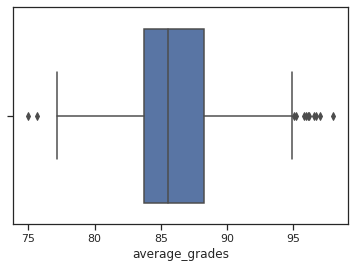

In [67]:
#строим график "ящик с усами"
sns.boxplot(x=data["average_grades"])

###Задача 2 (№21)
Для набора данных проведите масштабирование данных для одного (произвольного) числового признака с использованием масштабирования по медиане.

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import datetime
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold
import joblib
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from category_encoders.one_hot import OneHotEncoder as ce_OneHotEncoder

In [75]:
data.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False


In [76]:
data.describe()

,parent_age,parent_salary,house_area,average_grades
count,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,52.208000,5.381570e+06,74.515300,86.097200
std,3.500427,1.397546e+06,15.293346,3.378738
min,40.000000,1.000000e+06,20.000000,75.000000
25%,50.000000,4.360000e+06,64.600000,83.737500
50%,52.000000,5.440000e+06,75.500000,85.575000
75%,54.000000,6.382500e+06,84.825000,88.262500
max,65.000000,1.000000e+07,120.000000,98.000000


In [77]:
data_new2 = data[["parent_age", "parent_salary", "house_area", "average_grades"]]

In [82]:
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=data_new2.columns)
    return res

In [85]:
def draw_graph(col_list, data1, data2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(20,6))
    ax1.set_title(label1)
    sns.kdeplot(data=data1[col_list], ax=ax1)  
    ax2.set_title(label2)
    sns.kdeplot(data=data2[col_list], ax=ax2)
    plt.show()

In [83]:
rs = RobustScaler()
data_median_scale_arr = rs.fit_transform(data_new2)
data_median_scale = arr_to_df(data_median_scale_arr)  
data_median_scale.describe()

,parent_age,parent_salary,house_area,average_grades
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,0.052000,-0.028890,-0.048687,1.154033e-01
std,0.875107,0.690999,0.756160,7.466825e-01
min,-3.000000,-2.195303,-2.744129,-2.337017e+00
25%,-0.500000,-0.533993,-0.538937,-4.060773e-01
50%,0.000000,0.000000,0.000000,1.570142e-15
75%,0.500000,0.466007,0.461063,5.939227e-01
max,3.250000,2.254635,2.200247,2.745856e+00


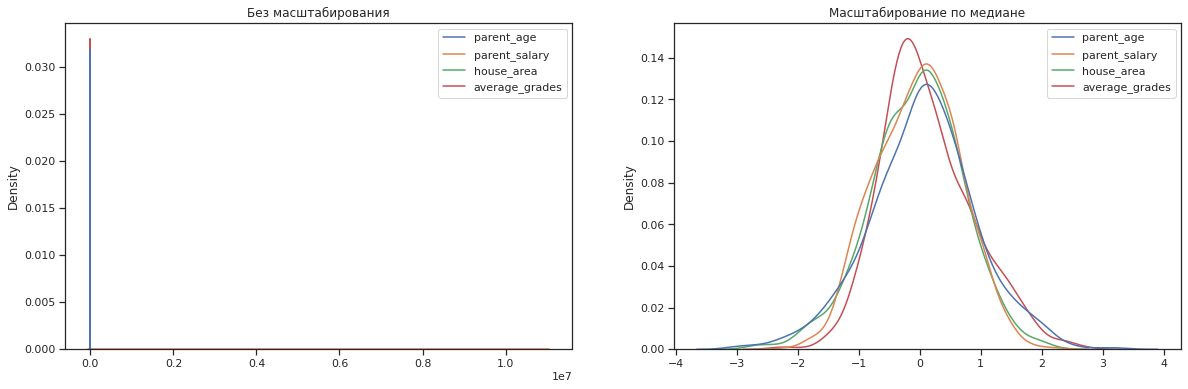

In [86]:
draw_graph(["parent_age", "parent_salary", "house_area", "average_grades"], data, data_median_scale,'Без масштабирования', 'Масштабирование по медиане')

###Диаграмма "Ящик с усами"

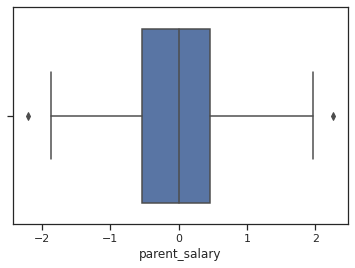

In [87]:
#строим график "ящик с усами"
sns.boxplot(x=data_median_scale["parent_salary"])